# İTÜ Büyük Veri ve İş Analitiği Proje Ödevi

## Kalp Hastalığına Yakalanma Riski Tahmin Projesi

### Hazırlayan: Zinnet BAHÇETEPE

    Proje Adımları
    1. Kütüphanelerin Yüklenmesi (Importing)
    2. Veri Setinin Yüklenmesi (Loading Dataset)
    3. Özet Veri Bilgisi (About Dataset)
        3.1. Kolonların Yeniden İsimlendirilmesi (Rename of Columns)
        3.2 Kolon Açıklamaları (Attribute Information)
        3.3. Değişken Analizi (Variable Analysis)
        3.4. Detaylı Veri Analizi (Detailed Data Analysis)
    4. Veri Setinin Düzenlenmesi (Regulation of Dataset)
    5. Veri Temizleme (Data Cleaning)
    6. Veri Görselleştirme (Data Visualization)
    7. Modelleme Hazırlığı (Modeling Preparation)
        7.1 Korelasyon Hesaplama (Correlation)
        7.2 Outlier Değerlerin İncelenmesi (Review of Outlier Values)
        7.3 Outlier Değerlerin Temizlenmesi (Outliers Cleaning)
    8. Modelleme (Modeling)
        8.1. Eğitim ve Test Verisi Oluşturma (Spliting Data)
        8.2. Lineer Regrasyon (Linear Regression)
            8.2.1.  Lineer Regrasyon Modelinin  Doğruluğu (Model Accuracy for Linear Regression)
        8.3. Sınıflandırma Modeli (Classification)
            8.3.1. Karar Ağacının Oluşturulması (Creating Decision Tree)
            8.3.2. Karar Ağacı Modelinin Güvenilirliği (Reliability of the Model for Decision Tree )
        8.4. SVM
            8.4.1. SVM Modelinin Oluşturulması (Creating SVM)
            8.4.2. SVC Modelinin Güvenilirliği (Reliability of the Model for SVC )
 

### 1. Kütüphanelerin Yüklenmesi (Importing)

In [498]:
#erileri Analiz İçin Gerekli Kütüphaneler
import pandas as pd
import numpy as np 

#Görselleştirme İçin Gerekli Kütüphaneler
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

#eğitim ve Test Veri Setlerinin Oluşturulması için
from sklearn.model_selection import cross_val_score

#Lineer Regresyon Modelinin Oluşturulması İçin
from sklearn.linear_model import LinearRegression

#Modelin Doğruluğunun Ölçülebilmesi İçin
from sklearn.metrics import r2_score

#Sınıflandırma ve Karar Ağacı Modelinin Oluşturulması için
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline 
from sklearn.tree import DecisionTreeClassifier, plot_tree 

#svc Modelinin Oluşturulması için
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### 2. Veri Setinin Yüklenmesi (Loading Dataset)

In [45]:
hdata = pd.read_csv('/Users/zinnet.bahcetepe/Desktop/HeartDisease/heart.csv')

In [46]:
                    #Age ve Sex kolonu için çoklu indexleme işlemi kalıcı olarak yapılmıştır
#hdata = pd.read_csv('/Users/zinnet.bahcetepe/Desktop/HeartDisease/heart.csv',index_col=["age", "sex"])    

### 3. Özet Veri Bilgisi (About Dataset)

In [122]:
#Data Frame tablo bilgisi
hdata 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


        -Data setinde toplamda 300 satır ve 14 kolon bulunmaktadır.
        -Tüm veri tipleri sayısaldır. (Sdece oldpeak kolonu float, diğerleri int)

In [123]:
#Kolonlar
print(hdata.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


#### 3.1 Kolonların Yeniden İsimlendirilmesi (Rename of Columns)

In [124]:
#Kolon adları anlamayı kolaylaştıracak şekilde yeniden düzenlenmiştir ve "df" adlı yeni veri seti oluşturulmuştur
df = hdata.rename(columns = {'sex':'gender','cp':'chest_pain' ,'trestbps':'resting_blood_pressure','chol':'cholesterol','fbs':'fasting_blood_sugar',
                    'restecg':'ecg_results','thalach':'max_heart_rate','exang':'exercise_induced_angina','oldpeak':'st_depression','ca':'major_vessels',
                   'thal':'thalassemia_types','target':'heart_attack','slope':'st_slope'} , inplace = False)

In [125]:
df.head()

,age,gender,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia_types,heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [126]:
print(df.columns)

Index(['age', 'gender', 'chest_pain', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'ecg_results', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'major_vessels',
       'thalassemia_types', 'heart_attack'],
      dtype='object')


#### 3.1. Kolon Açıklamaları (Attribute Information)

    -age: yaş bilgini içermektedir
    sex: (1 = male; 0 = female)
    -gender: (1 = male; 0 = female)
    cp: chest pain type (typical angina, atypical angina, non-angina, or asymptomatic angina)
    -chest_pain: göğüs ağrısı tipi (3=tipik anjin, 2=atipik anjin, 1=non-anjin veya 0=asemptomatik anjin)
    trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    -resting_blood_pressure: tansiyon 
    chol: serum cholestoral in mg/dl
    -cholesterol: serum kolestral (mg/dl)
    fbs: Fasting blood sugar (< 120 mg/dl or > 120 mg/dl) (1 = true; 0 = false)
    -fasting_blood_sugar: Açlık kan şekeri (< 120 mg/dl or > 120 mg/dl) (1 = true; 0 = false)
    restecg: resting electrocardiographic results (normal, ST-T wave abnormality, or left ventricular hypertrophy)
    -ecg_results: istirahat elektrokardiyografik sonuçlar (normal, ST-T dalga anormalliği veya sol ventrikül hipertrofisi)
    thalach: Max. heart rate achieved during thalium stress test
    -max_heart_rate: Thalium stres testi sırasında elde edilen Max. kalp atış hızı
    exang: Exercise induced angina (1 = yes; 0 = no)
    -exercise_induced_angina: Egzersizle artan göğüs ağrısı (1 = evet; 0 = hayır) (yürüyüş yaparken göğüs ağrısının olması)
    oldpeak: ST depression induced by exercise relative to rest
    -st_depression: ST depresyon dinlenmeye göre egzersiz tarafından indüklenen 
    slope: Slope of peak exercise ST segment (0 = upsloping, 1 = flat, or 2 = downsloping)
    -st_slope: Pik egzersiz ST segmentinin eğimi (0 = upsloping, 1 = düz veya 2 = downsloping) (ST dalgası, 2 normal; 0 ve 1 
    için anormal olarak düşünülebilir)
    ca: number of major vessels (0-3) colored by flourosopy 4 = NA
    -major_vessels: tıkanan ana damar sayısını gösterir (0:4 ana damarı tıkalı; 3: hiçbir damar tıkalı değil anlamındadır (0-3)
    thal: Thalium stress test result 3 = normal; 6 = fixed defect; 7 = reversable defect 0 = NA
    -thalassemia_types: Thalium stres testi sonucu 3 = normal; 6 = sabit kusur; 7 = geri döndürülebilir kusur 0 = NA
    target: Heart disease status 1 or 0 (0 = heart disease 1 = asymptomatic)
    -heart_attack: Kalp krizi yaşama durumu (0 = kalp krizi geçirmiş 1 = kalp krizi geçirmemis)

#### 3.3. Değişken Analizi (Variable Analysis)

In [127]:
#Data Frame'in veri tipleri ile ilgili bilgiler
df.info

<bound method DataFrame.info of      age  gender  chest_pain  resting_blood_pressure  cholesterol  \
0     63       1           3                     145          233   
1     37       1           2                     130          250   
2     41       0           1                     130          204   
3     56       1           1                     120          236   
4     57       0           0                     120          354   
..   ...     ...         ...                     ...          ...   
298   57       0           0                     140          241   
299   45       1           3                     110          264   
300   68       1           0                     144          193   
301   57       1           0                     130          131   
302   57       0           1                     130          236   

     fasting_blood_sugar  ecg_results  max_heart_rate  \
0                      1            0             150   
1                      0 

In [128]:
#Kolonlardaki değişken sayısı aşağıda listelenmiştir
for col in df.columns:
    print(col, df[col].nunique())

age 41
gender 2
chest_pain 4
resting_blood_pressure 49
cholesterol 152
fasting_blood_sugar 2
ecg_results 3
max_heart_rate 91
exercise_induced_angina 2
st_depression 40
st_slope 3
major_vessels 5
thalassemia_types 4
heart_attack 2


#### 3.4. Detaylı Veri Analizi (Detailed Data Analysis)

In [129]:
#Tnsiyonu 120'den büyük olanların toplam sayısını aşağıdaki şekilde elde ettik:
(df.resting_blood_pressure > 120).sum()

206

In [130]:
#Tansiyonu 130'dan ve kolestrolü 200'den büyük olanlar
df.query("resting_blood_pressure > 130 & cholesterol > 200") 

,age,gender,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia_types,heart_attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0


In [131]:
#Veri setindeki "resting_blood_pressure" kolonuna göre en yüksek 20 veriyi listeledik
df.nlargest(10,"resting_blood_pressure")

,age,gender,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia_types,heart_attack
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
152,64,1,3,170,227,0,0,155,0,0.6,1,0,3,1


In [132]:
#Hem chol hem trestbps değerleri yüksek ilk 20 veri
df.nlargest(10,["resting_blood_pressure","cholesterol"])

,age,gender,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia_types,heart_attack
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
195,59,1,0,170,326,0,0,140,1,3.4,0,0,3,0


In [133]:
#Tansiyon değeri 120'den büyük ve yaşı 60 üstü olanlar
df.query("age > 60 & resting_blood_pressure > 120" )
len(df.query("age > 60 & resting_blood_pressure > 120" ))

59

In [134]:
#Veri setindeki chol kolonuna göre en yüksek 20 veriyi listeledik
df.nlargest(10,"cholesterol")

,age,gender,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia_types,heart_attack
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0


In [135]:
#Yaşı 60'tan büyük olan insanların %74,6835443'ünün tansiyonu 120 ve üzeri
len(df.query("age > 60" ))

79

### 4. Veri Setinin Düzenlenmesi (Regulation of Dataset)
##### İlişkili Kolonların İncelenmesi ve Modele Uygun Veri Setlerinin Oluşturulması

In [136]:
# Pivot_Table fonksiyonu kullanılarak "age" kolonu indexleyerek, "gender" kolonuna göre "resting_blood_pressure" değeri için ortalamayı hesapladığımızda:
df_blood_pres = df.pivot_table(values="resting_blood_pressure", index="age", columns="gender", aggfunc="mean")

In [137]:
#Pivot_Table fonksiyonu kullanılarak "age" kolonu indexleyerek, "gender" kolonuna göre "cholesterol" değeri için ortalamayı hesapladığımızda:
df_chol = df.pivot_table(values="cholesterol", index="age", columns="gender", aggfunc="mean")

In [138]:
df_blood_pres.head()

gender,0,1
age,,
29,NaN,130.000000
34,118.0,118.000000
35,138.0,122.666667
37,120.0,130.000000
38,NaN,132.000000


In [139]:
df_chol.head()

gender,0,1
age,,
29,NaN,204.000000
34,210.0,182.000000
35,183.0,224.000000
37,215.0,250.000000
38,NaN,193.666667


In [142]:
#Yaş indexinde cinsiyete göre "resting_blood_pressure" (tansiyon) ve "cholesterol" (kolestrol) değerlerinin ortalamalarını "df_blood_pres_chol" veri setinde incelenmiştir
df_blood_pres_chol = df.pivot_table(values=["resting_blood_pressure", "cholesterol"], index=["age", ], columns="gender", aggfunc="mean")

In [143]:
df_blood_pres_chol.head()

cholesterol             resting_blood_pressure            
gender           0           1                      0           1
age                                                              
29             NaN  204.000000                    NaN  130.000000
34           210.0  182.000000                  118.0  118.000000
35           183.0  224.000000                  138.0  122.666667
37           215.0  250.000000                  120.0  130.000000
38             NaN  193.666667                    NaN  132.000000

In [144]:
df.head

<bound method NDFrame.head of      age  gender  chest_pain  resting_blood_pressure  cholesterol  \
0     63       1           3                     145          233   
1     37       1           2                     130          250   
2     41       0           1                     130          204   
3     56       1           1                     120          236   
4     57       0           0                     120          354   
..   ...     ...         ...                     ...          ...   
298   57       0           0                     140          241   
299   45       1           3                     110          264   
300   68       1           0                     144          193   
301   57       1           0                     130          131   
302   57       0           1                     130          236   

     fasting_blood_sugar  ecg_results  max_heart_rate  \
0                      1            0             150   
1                      0   

In [145]:
#Veri setindeki tüm kolonlar için mean, min, max değerleri tablosu
df.describe()

,age,gender,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia_types,heart_attack
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### 5. Veri Temizleme (Data Cleaning)

        -Hatalı ve tutarsız verilerin temizlenmesi
        -Kayıp değerlerin ve bunlarla ilgili yöntemlerin belirlenmesi
        -Verideki Outlier değerler için yöntemlerin belirlenmesi ve uygulanması
        -Oluşturulan ek data framelerdeki NaN değerlerin numeric hesaplamamlar yapılabilmesi için "0" ile değiştirilmesi

In [146]:
#Bu sorgu ile birlikte verimizde ?, Null veya NaN yazılı değerlerin olmadığı tespit edilmiştir.
col_names = hdata.columns
num_data = hdata.shape[0]
for c in col_names:
    num_non = hdata[c].isin([" ?", "NaN", "Null"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100), '\n')

In [147]:
#fillna fonksiyonu ile "df_blood_pres" tablosunda "NaN" yazılı değerler "0" ile değiştirilmiştir:
df_blood_pres.fillna(0).head()

gender,0,1
age,,
29,0.0,130.000000
34,118.0,118.000000
35,138.0,122.666667
37,120.0,130.000000
38,0.0,132.000000


In [148]:
#fillna fonksiyonu ile "df_chol" tablosunda "NaN" yazılı değerler "0" ile değiştirilmiştir:
df_chol.fillna(0).head()

gender,0,1
age,,
29,0.0,204.000000
34,210.0,182.000000
35,183.0,224.000000
37,215.0,250.000000
38,0.0,193.666667


In [149]:
#fillna fonksiyonu ile hd_tres_chol tablosunda "NaN" yazılı değerler "0" ile değiştirilmiştir:
df_blood_pres_chol.fillna(0).head(5)

cholesterol             resting_blood_pressure            
gender           0           1                      0           1
age                                                              
29             0.0  204.000000                    0.0  130.000000
34           210.0  182.000000                  118.0  118.000000
35           183.0  224.000000                  138.0  122.666667
37           215.0  250.000000                  120.0  130.000000
38             0.0  193.666667                    0.0  132.000000

### 6. Veri Görselleştirme (Data Visualization)

In [150]:
#Sayısal değişkenler hakkında daha doğru değerlendirme yapabilmesi için histogram ve boxplok grafikleri incelenmiştir.
#Öncelikle histogramını almak istediğimiiz değişkenlerden ayrı bir veri seti oluşturuyoruz "num_df"
num_df = df.select_dtypes(include=['int64'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C9D74E4F0>,
      dtype=object)

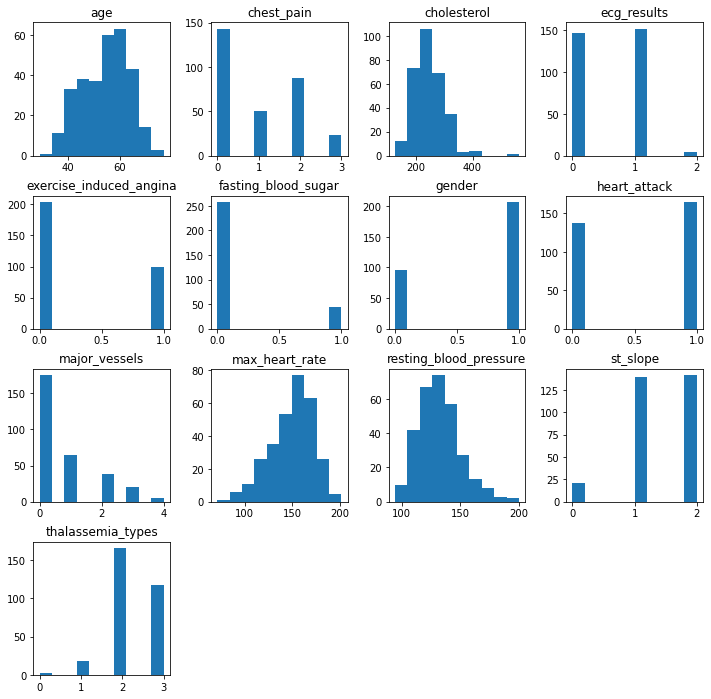

In [151]:
num_df.hist(figsize=(12,12), grid=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C9CB9CB20>,
      dtype=object)

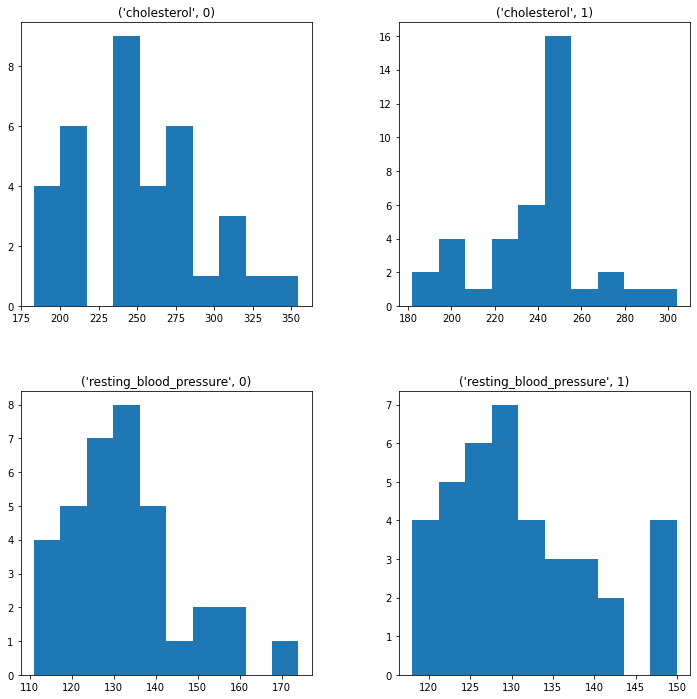

In [152]:
df_blood_pres_chol.hist(figsize=(12,12), grid=False)

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <a list of 10 Patch objects>)

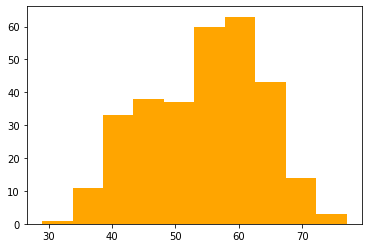

In [205]:
#Yaş kolonu için histogram grafiği incelenmiştir
plt.hist(df['age'], color="Orange", bins=10)

(array([ 1.,  6., 11., 26., 35., 53., 77., 63., 26.,  5.]),
 array([ 71. ,  84.1,  97.2, 110.3, 123.4, 136.5, 149.6, 162.7, 175.8,
        188.9, 202. ]),
 <a list of 10 Patch objects>)

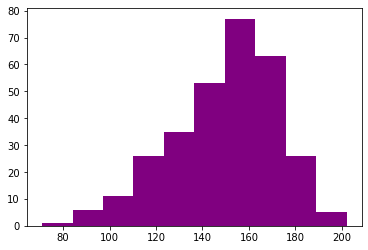

In [203]:
#Kalp Atış Hızı = "max_heart_rate" histogram grafiği incelenmiştir
plt.hist(df['max_heart_rate'], color="Purple")

###### Cinsiyet ve Yaş indexinde Kalp Krizi geçirme durumu grafiği incelenmiştir

In [153]:
#df_gah ="gender", "age" and "heart_attack"
#1:male; 0:female
df_gah = df.groupby(['gender','age'])['heart_attack'].count().reset_index().sort_values(by='heart_attack',ascending=False)
df_gah.head(20).style.background_gradient(cmap='Oranges')

,gender,age,heart_attack
59,1,58,13
58,1,57,13
60,1,59,13
53,1,52,12
55,1,54,11
45,1,44,9
52,1,51,8
57,1,56,8
61,1,60,7
65,1,64,7


-Yukarıdaki veri setinde, erkeklerin kadınlara göre daha fazla kalp krizi geçirdikleri görülmektedir

###### Cinsiyet ve Göğüs Ağrısı olma durumuna göre Kalp Krizi geçirme sayısı grafiği incelenmiştir.

In [169]:
#df_gch = "gender" , "chest_pain" and "heart_attack"
#chest_pain: göğüs ağrısı tipi (3=tipik anjin, 2=atipik anjin, 1=non-anjin veya 0=asemptomatik anjin)
#1:male; 0:female
df_gch = df.groupby(['gender' , 'chest_pain'])['heart_attack'].count().reset_index().sort_values(by='heart_attack' , ascending=False)
df_gch.head(20).style.background_gradient(cmap='Purples')


,gender,chest_pain,heart_attack
4,1,0,104
6,1,2,52
0,0,0,39
2,0,2,35
5,1,1,32
7,1,3,19
1,0,1,18
3,0,3,4


Yukarıdaki tablo erkekler ve kadınlar için incelendiğinde:
Erkekler için (male:1), göğüs ağrısı olmamasına rağmen (chest_pain=0 veya 1) kalp krizinin daha çok geçirildiği görülmektedir.
Erkeklerden sadece 19'unun göğüs ağrısı olduğu (chest_pain=3) ve kalp krizi geçirdikleri görülmektedir; 
Kadınlar için incelendiğinde (female:) göğüs ağrısı olduğu (chest_pain=3) kalp krizi geçirme sayısı 4'tür.
Kadınların göğüs ağrılarının olmadığı (chest_pain=0) durumda kalp krizi geçirme sayıları 39'dur
Dolayısıyla tabloda rengin koyulaşması, kalp krizi olasılığının azaldığını göstermektedir.

###### Cinsiyet ve Kalp Atış Hızı'na göre Kalp Krizi geçirme sayısı grafiği incelenmiştir

In [172]:
#df_gmh = "gender", "maximum_heart_rate" and "heart_attack" 
#1:male; 0:female and "max_heart_rate": Kalp atış hızı oranı
df_gmh = df.groupby(['gender', 'max_heart_rate'])['heart_attack'].count().reset_index().sort_values(by='heart_attack', ascending=False)
df_gmh.head(10).style.background_gradient(cmap='bone')

,gender,max_heart_rate,heart_attack
86,1,144,7
77,1,132,7
103,1,162,7
113,1,173,7
82,1,140,6
42,0,172,6
91,1,150,6
70,1,125,6
97,1,156,6
34,0,163,5


Yukarıdaki tabloda Erkekler için kalp krizi geçirenlerde maximum kalp atış hızının daha yüksek olduğu görülmüştür.

###### Cinsiyet ve Egzersiz sırasında göğüs ağrısı oluşma durumu indexinde Kalp Krizi geçirme sayısı grafiği incelenmiştir

In [176]:
#df_geh = "gender", "exercise_induced_angina" and "heart_attack"
#1:male; 0:female and "exercise_induced_angina": Egzersizle artan göğüs ağrısı (1 = evet; 0 = hayır)
df_geh = df.groupby(['gender' , 'exercise_induced_angina'])['heart_attack'].count().reset_index().sort_values(by='heart_attack' , ascending=False)
df_geh.style.background_gradient(cmap='copper')

,gender,exercise_induced_angina,heart_attack
2,1,0,130
3,1,1,77
0,0,0,74
1,0,1,22


Erkeklerin ½37,2'sinde egzersiz sırasında yaşanan göğüs ağrısı olduğunda kalp krizi yaşama oranınında yüksek olduğu görülmüştür.

###### Cinsiyet ve Tıkanan Ana Damar sayısı indexinde Kalp Krizi geçirme durumu grafiği incelenmiştir

In [174]:
#df_gmvh ="gender", "major_vessels" and "heart_attack"
#1:male; 0:female  
#major_vessels: tıkanan ana damar sayısını gösterir (0:4 ana damarı tıkalı; 3: hiçbir damar tıkalı değil anlamındadır (0-3)
df_gmvh = df.groupby(['gender', 'major_vessels'])['heart_attack'].count().reset_index().sort_values(by='heart_attack' , ascending=False)
df_gmvh.head(10).style.background_gradient(cmap='RdPu')

,gender,major_vessels,heart_attack
4,1,0,111
0,0,0,64
5,1,1,50
6,1,2,25
7,1,3,16
1,0,1,15
2,0,2,13
8,1,4,5
3,0,3,4


Grafiğe göre tıkalı ana damar sayısı yükseldikçe (0) kalp krizi geçirme durumu artmaktadır.
4 ana damarı tıkalı olan kadın ve erkeklerin, kalp krizi sayıları incelendiğinde erkeklerin sayısının kadınlardan yüksek olduğu görülmektedir.

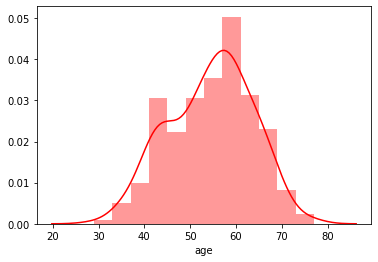

In [274]:
#Yaş Histogram Grafiği
sns.distplot(df['age'], color= "Red")

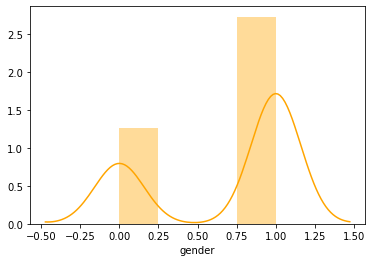

In [276]:
#Cinsiyet Histogram Grafiği
sns.distplot(df['gender'], color= "Orange")

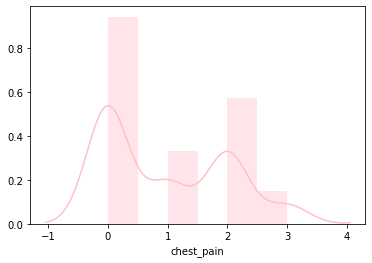

In [282]:
#Göğüs Ağrısı Histogram Grafiği
sns.distplot(df['chest_pain'], color= "Pink")

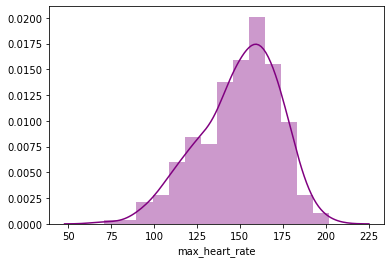

In [283]:
#Max. Kalp Atış Hızı Histogram Grafiği
sns.distplot(df['max_heart_rate'], color= "Purple")

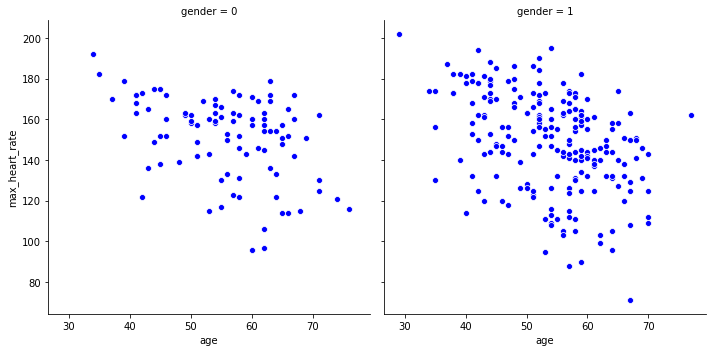

In [298]:
sns.relplot(x ='age', y ='max_heart_rate', col = 'gender', data = df, color = 'Blue')

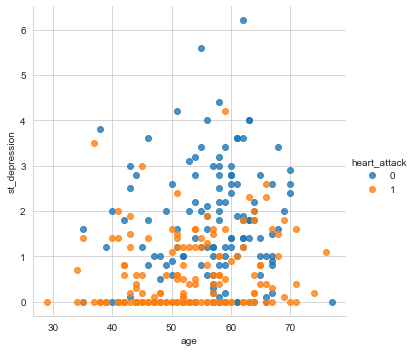

In [310]:
#Yaş ve st_depression değerlerine göre Kalp Hastalığı dağılımın incelenmesi
#1:male; 0:female 
sns.lmplot('age' , 'st_depression' , data = df , hue='heart_attack' , fit_reg=False , height=5)
plt.show()

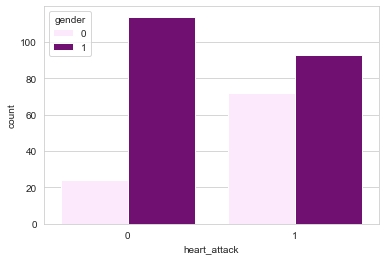

In [308]:
#Kalp Hastalığı ve Cinsiyet
#1:male; 0:female 
sns.set_style('whitegrid') 
sns.countplot(x='heart_attack',hue='gender', data=df, color='Purple')

Yukarıdaki grafiktede görüldüğü üzere kadınlar erkeklere göre kalp hastalığı daha fazla yaşıyor

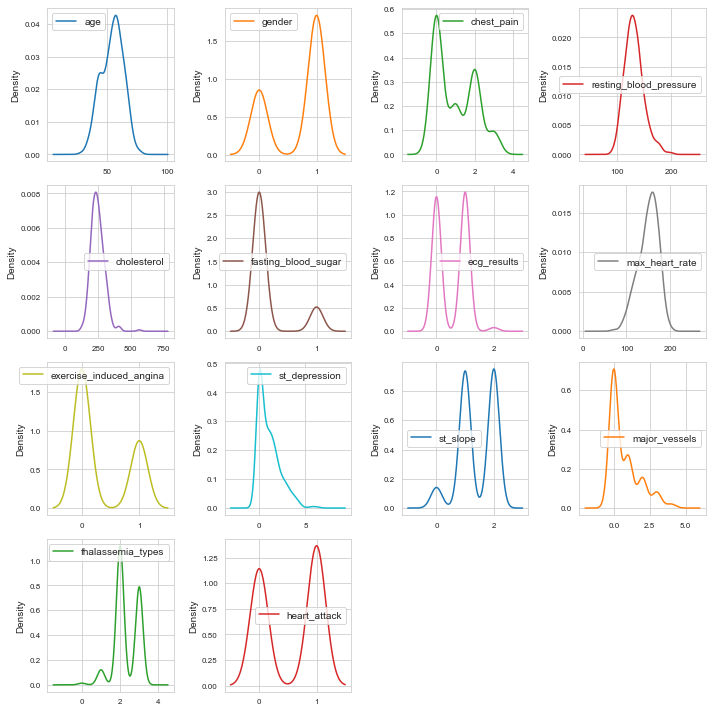

In [309]:
df_heart=df.plot(kind='density' , subplots=True , layout=(4,4) , sharex=False ,
          fontsize=8 , figsize=(10,10))
plt.tight_layout()


### 7. Modelleme Hazırlığı (Modeling Preparation)


#### 7.1 Korelasyon Hesaplama (Correlation) 

In [245]:
df_corr = df.corr().style.background_gradient(cmap='OrRd')
df_corr                              

,age,gender,chest_pain,resting_blood_pressure,cholesterol,fasting_blood_sugar,ecg_results,max_heart_rate,exercise_induced_angina,st_depression,st_slope,major_vessels,thalassemia_types,heart_attack
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
ecg_results,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
max_heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
st_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Korolasyon Analizinde hiçbir kolon çiftinin 1 değerine yakın olmadığı görülmüştür. Silinmesi gereken kolon bulunmamaktadır.


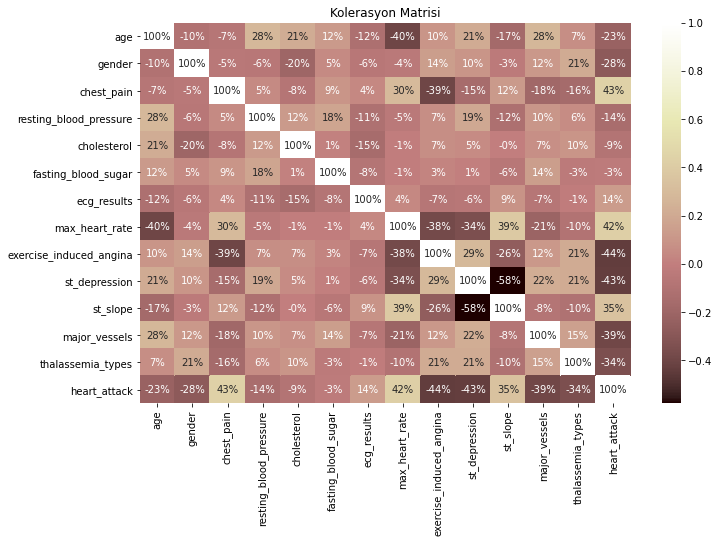

In [266]:
#Kolerasyon Matrisi
plt.figure(figsize=(11,7))
sns.heatmap(cbar=True,annot=True,fmt=".0%", data=df.corr(),cmap='pink')
plt.title('Kolerasyon Matrisi')
plt.show()

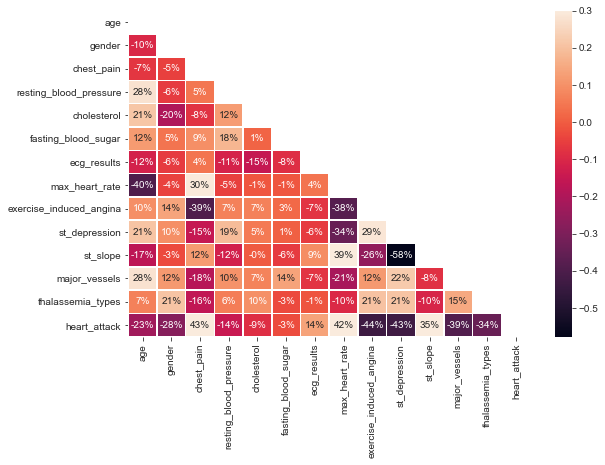

In [327]:
#annot: karelerdeki % değerlerini göstermesi için kullanılmıştır
#square= True ise ½ değeri küçük olanları getir; square= False ise ½ değerleri büyük
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("ticks"):
    f, ax = plt.subplots(figsize=(9, 6))
    ax = sns.heatmap(df.corr(), mask = mask, vmax=.3, annot=True, fmt=".0%", linewidth=0.5, square=False)


Yukarıdaki gafik incelendiğinde koyu mor olan kolonları çıkardığımızda aşağıdaki dataseti oluşmaktadır

In [340]:
#Korelasyon incelemesinden sonra Model için uygun veri seti oluşturulmuştur
df=df[['age', 'gender', 'chest_pain', 'max_heart_rate',
       'exercise_induced_angina', 'st_slope', 'major_vessels',
       'thalassemia_types', 'heart_attack']]

#### 7.2. Outlier Değerlerin İncelenmesi (Review of Outlier Values)

Text(0.5, 0, 'Göğüs Ağrısı')

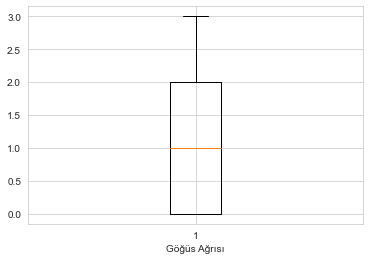

In [341]:
#Göğüs Ağrısı için boxplot grafiği
cp = plt.boxplot(df['chest_pain'])
plt.xlabel("Göğüs Ağrısı")

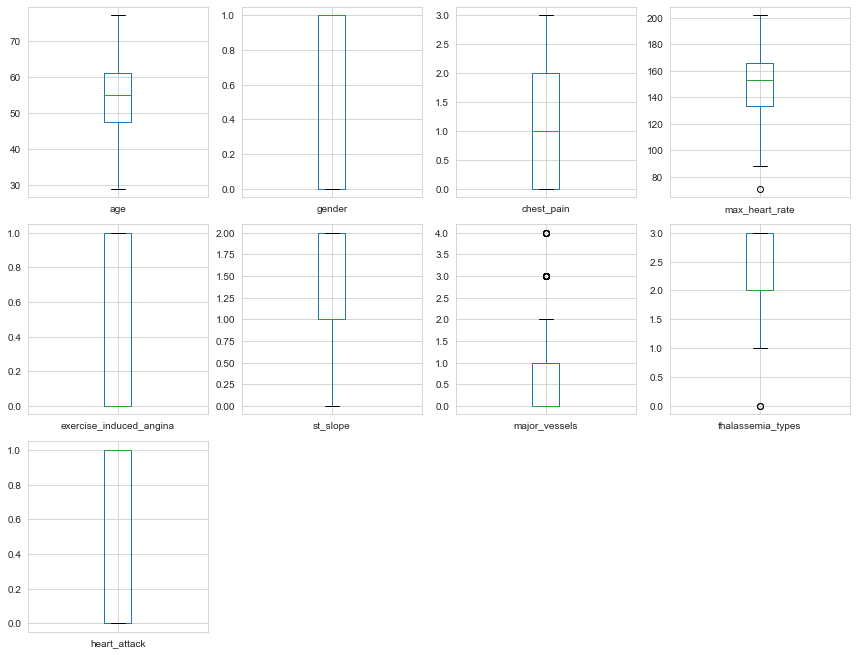

In [342]:
df.plot(kind='box' , subplots=True , layout=(4,4) , sharex=False ,
          fontsize=10 , figsize=(12,12))
plt.tight_layout()

In [343]:
#Kalp Atış Hızı için outlier değer sayısı
#max_heart_rate: Thalium stres testi sırasında elde edilen Max. kalp atış hızı

print('outliers' , df[(df['max_heart_rate']<75)]['max_heart_rate'].count())

outliers 1


In [344]:
#Tıkalı Ana Damar için outlier değer sayısı
#major_vessels: tıkanan ana damar sayısını gösterir (0:4 ana damarı tıkalı; 3: hiçbir damar tıkalı değil anlamındadır (0-3)

print('outliers' , df[(df['major_vessels']>=3)]['major_vessels'].count())

outliers 25


In [345]:
#Stres Testi Sonucu için outlier değer sayısı
#thalassemia_types: Thalium stres testi sonucu 3 = normal; 6 = sabit kusur; 7 = geri döndürülebilir kusur 

print('outliers' , df[(df['thalassemia_types']<=0)]['thalassemia_types'].count())

outliers 2


#### 7.3. Outlier Değerlerin Temizlenmesi (Outliers Cleaning)

In [346]:
#major_vessels:Tıkalı Ana Damar için outlier değerlerin temizlenmesi
df_clean = df[(df['major_vessels']<=3.5)]

In [347]:
df_clean

,age,gender,chest_pain,max_heart_rate,exercise_induced_angina,st_slope,major_vessels,thalassemia_types,heart_attack
0,63,1,3,150,0,0,0,1,1
1,37,1,2,187,0,0,0,2,1
2,41,0,1,172,0,2,0,2,1
3,56,1,1,178,0,2,0,2,1
4,57,0,0,163,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,57,0,0,123,1,1,0,3,0
299,45,1,3,132,0,1,0,3,0
300,68,1,0,141,0,1,2,3,0
301,57,1,0,115,1,1,1,3,0


Satır sayısı 298'e inmiştir (major_vessels için 25 adet olan outlier veri kaldırılmıştır)

###    8. Modelleme (Modeling)

#### 8.1. Eğitim ve Test Verisi Oluşturma (Spliting Data)

In [448]:
from sklearn.model_selection import cross_val_score

In [449]:
x = df_clean.drop(['heart_attack'] , axis=1).values

In [450]:
y = df_clean['heart_attack'].values

In [451]:
#Datanın ½70'i Eğitim için; ½30'u Test için ayrılmıştır
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.03 ,random_state=40 )

In [452]:
x_train

array([[77,  1,  0, ...,  2,  3,  2],
       [59,  1,  0, ...,  2,  0,  2],
       [64,  1,  3, ...,  1,  0,  2],
       ...,
       [53,  1,  0, ...,  0,  0,  3],
       [44,  1,  1, ...,  2,  0,  3],
       [56,  0,  0, ...,  0,  2,  3]], dtype=int64)

In [453]:
x_train.shape

(289, 8)

In [454]:
y_train.shape

(289,)

####  8.2. Lineer Regrasyon (Linear Regression)      

In [359]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train , y_train)
y_pred = reg.predict(x_test)

In [360]:
#Eğitim Datası için Puanın Hesaplanması
reg.score(x_train,y_train)

0.5089475649292499

In [362]:
#Test Datası için Puanın Hesaplanması
reg.score(x_test,y_test)

0.7818928765356212

##### 8.2.1. Lineer Regrasyon Modelinin  Doğruluğu (Model Accuracy for Linear Regression)

Test Datası olarak ayrılmış Veriler içinde hesaplama yapılarak değerler karşılaştırılmıştır

In [365]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test , y_pred)
r2

0.7818928765356212

reg.score(x_test,y_test) ile r2 = r2_score(y_test , y_pred) aynı çıktıyı vermiştir, modelin doğruluğu görülmüştür.


#### 8.3. Sınıflandırma Modeli (Classification) 

##### 8.3.1. Karar Ağacının Oluşturulması (Creating Decision Tree)

In [475]:
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline 
from sklearn.tree import DecisionTreeClassifier, plot_tree 

In [476]:
df_dcs_tree = make_pipeline(StandardScaler(), DecisionTreeClassifier())

In [477]:
#Daha önceden hazırlanmış olan Eğitim Data seti ile Karar Ağacı modeli oluşturulmuştur

In [478]:
dcs_tree_model = df_dcs_tree.fit(x_train, y_train)

In [479]:
classes = {
    0: "Not Diseased",
    1: "Diseased"
}

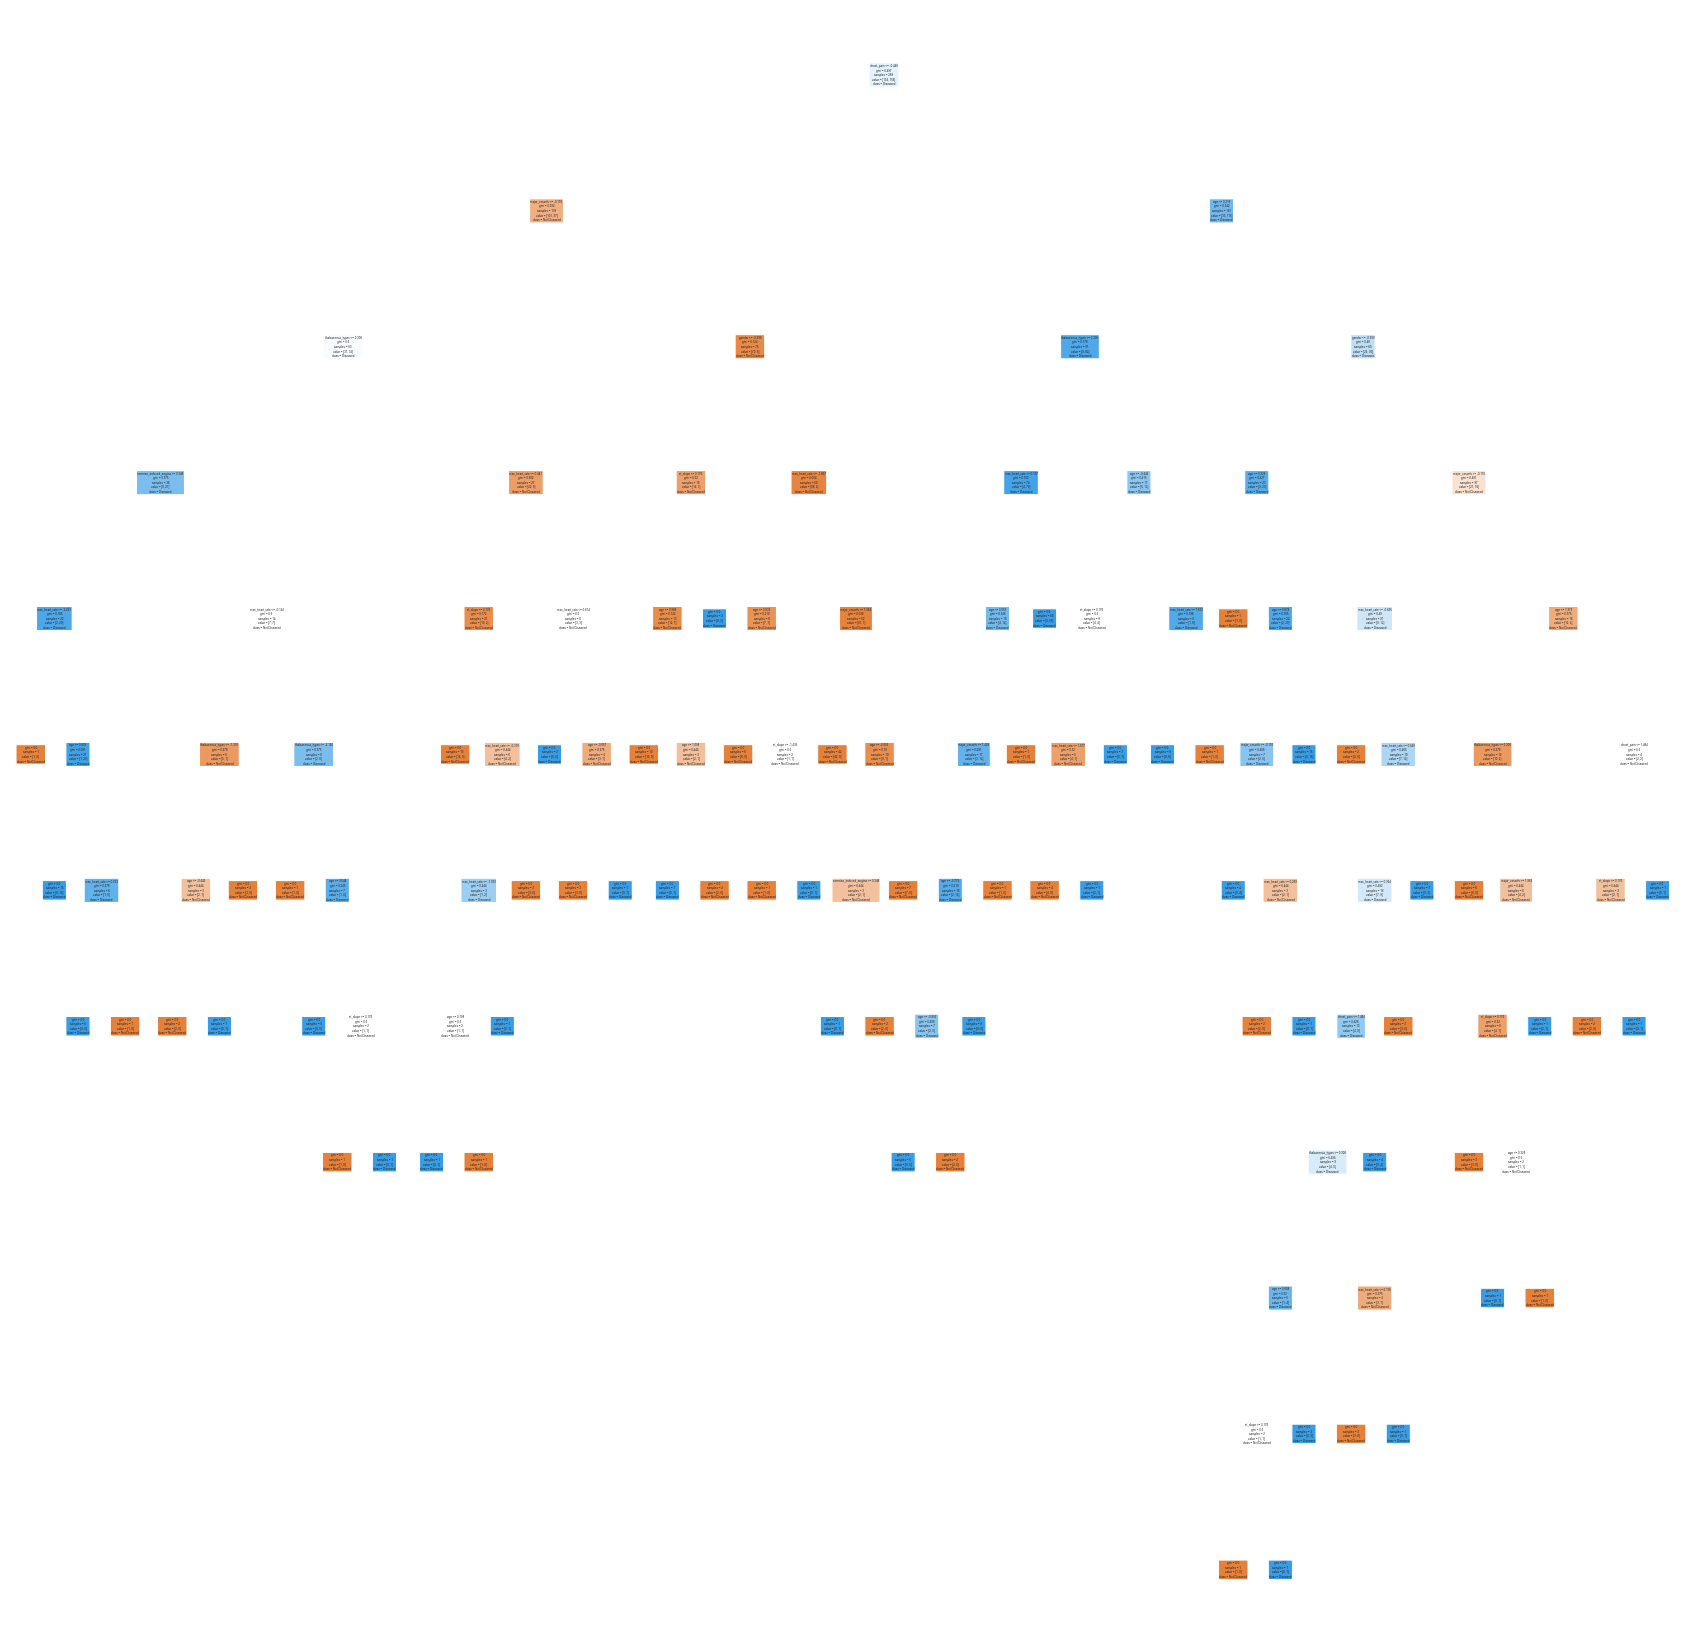

In [430]:
fig, ax = plt.subplots(figsize=(30, 30), sharex=True, sharey=True,)
train_tree_plot = plot_tree(dcs_tree_model["decisiontreeclassifier"], filled=True, rounded=True, class_names=list(classes.values()), feature_names=df_clean.columns)

##### 8.3.2.   Karar Ağacı Modelinin Güvenilirliği (Reliability of the Model for Decision Tree )

In [500]:
dcs_tree_model.score(x_train, y_train)

1.0


#### 8.4. SVM

##### 8.4.1. SVM Modelinin Oluşturulması (Creating SVM)

In [496]:
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [492]:
svc = SVC(probability=True)
svc.fit(x_train, y_train)

SVC(probability=True)

Support vector machine accuracy: 0.778 

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.83      0.83      0.83         6

    accuracy                           0.78         9
   macro avg       0.75      0.75      0.75         9
weighted avg       0.78      0.78      0.78         9



C:\Users\zinnet.bahcetepe\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Text(0.5, 1.0, 'Support Vector Machine')

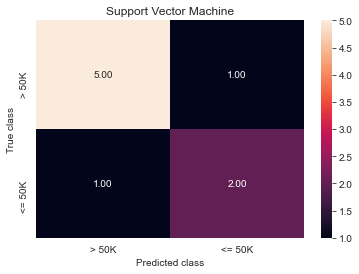

In [497]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(x_test))),'\n')
print(classification_report(y_test, svc.predict(x_test)))
svc_y_pred = svc.predict(x_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["> 50K", "<= 50K"] , yticklabels = ["> 50K", "<= 50K"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')

##### 8.4.2. SVC Modelinin Güvenilirliği (Reliability of the Model for SVC )

In [499]:
svc.score(x_train, y_train)

0.6955017301038062

Sonuç olarak modelin güvenilirlik sonuçları baz alındığında, bu veri seti için en uygun modelin "Karar Ağacı Modeli" olduğu görülmüştür.